# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 觀察填補缺值以及 標準化 / 最小最大化 對數值的影響

# [作業重點]
- 觀察替換不同補缺方式, 對於特徵的影響 (In[4]~In[6], Out[4]~Out[6])
- 觀察替換不同特徵縮放方式, 對於特徵的影響 (In[7]~In[8], Out[7]~Out[8])

In [55]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'D:/100days/data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')

train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [57]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
train_num = train_Y.shape[0]
print(train_num)
df.head()

891


,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


# 作業1
* 試著在補空值區塊, 替換並執行兩種以上填補的缺值, 看看何者比較好?=> ANS:比較A.空值補 -1, 做羅吉斯迴歸,B.空值補 0, 做羅吉斯迴歸,C.空值補平均值, 做羅吉斯迴歸. C最好,C>B>A

In [58]:
# A.空值補 -1, 做羅吉斯迴歸
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
x0=cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(x0)

0.696029912898


In [59]:
# B.空值補 0, 做羅吉斯迴歸
df_m1 = df.fillna(0)
train_X = df_m1[:train_num]
estimator = LogisticRegression()
x1=cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(x1)

0.697153508403


In [60]:
# C.空值補平均值, 做羅吉斯迴歸
df_mn = df.fillna(df.mean())
train_X = df_mn[:train_num]
estimator = LogisticRegression()
x2=cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(x2)

0.698176103372


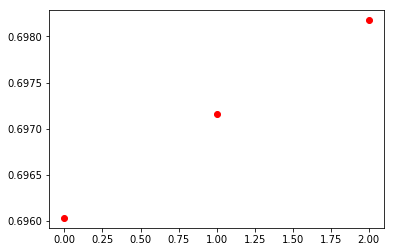

In [61]:
import matplotlib.pyplot as plt
plt.plot([x0,x1,x2],'ro')
plt.show()

# 作業2
* 使用不同的標準化方式 ( 原值 / 最小最大化 / 標準化 )，搭配羅吉斯迴歸模型，何者效果最好?=> B.空值補 0,搭配最大最小化,做羅吉斯迴歸  最好

In [62]:
# A.空值補 0,原值, 做羅吉斯迴歸
df= df.fillna(0)
train_X = df[:train_num]
estimator =LogisticRegression()
x3=cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(x3)

0.697153508403


In [63]:
# B.空值補 0,搭配最大最小化,做羅吉斯迴歸
df = df.fillna(0)
df_temp = MinMaxScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LogisticRegression()
x4=cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(x4)

0.701628988289


In [64]:
# C.空值補 0,搭配標準化,做羅吉斯迴歸
df = df.fillna(0)
df_temp = StandardScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LogisticRegression()
x5=cross_val_score(estimator, train_X, train_Y, cv=5).mean()
print(x5)

0.698258201772


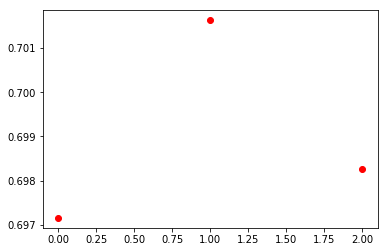

In [65]:
import matplotlib.pyplot as plt
plt.plot([x3,x4,x5],'ro')
plt.show()